In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon # to create patches
import sympy as sp # python library for symbolic mathematics

In [3]:
# define global figure properties

import matplotlib_inline.backend_inline
# display figues in vector format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# parameter changes
plt.rcParams.update({'font.size':14,
                     'axes.titlelocation': 'left',
                     'axes.spines.right': False,
                     'axes.spines.top': False})

### Figure 3.2: The math of the heart. 

Plotting equation 3.1: $(x^2 + y^2 - 1)^3 = x^2y^3 = 0$

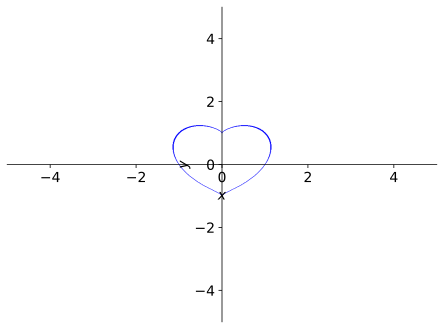

In [4]:
# transform strings 'x' and 'y' to instances of sympy Symbol class and assign them to variables x and y
x,y = sp.symbols('x,y')

# define the expression for the implicit function
expr = (x**2 + y**2 - 1)**3 - x**2 * y**3

# output
h = sp.plot_implicit(expr, show=True) # change the show parameter to False if you want to just get the output without displaying the figure


for grabbing midpoints of intervals, `h[0].get_data()` method is available which returns the intervals. 

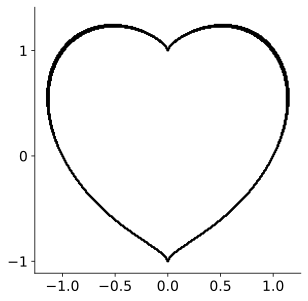

In [5]:

# grab midpoints of intervals and plot these
data = np.array([(x_int.mid, y_int.mid) for x_int, y_int in h[0].get_data()[0]]) 
plt.plot(data[:,0],data[:,1], 'k.', markersize=2)
plt.yticks([-1,0,1])
plt.axis('square')

plt.show()

### Figure 3.3: Bar plot of news sources

In [6]:
# bar heights and labels
news_sources = [40,10,85,20]
source_labels = ['TV', 'Newspapers', 'Internet', 'Word of mouth']

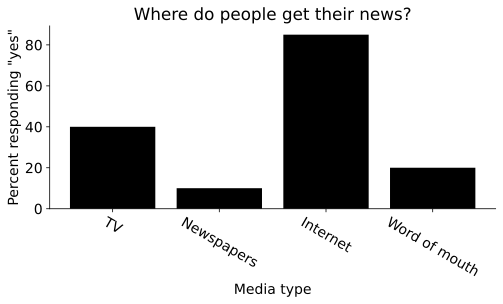

In [7]:
# Plot

# using dimensions from the original figure
fig, ax = plt.subplots(figsize=(8,3.3))

# plotting the bars
ax.bar(source_labels, news_sources, color='black')

# adding the labels
ax.set_title('Where do people get their news?', loc='center')
ax.set_xlabel('Media type')
ax.set_ylabel('Percent responding "yes"')
plt.xticks(rotation=-30)

#display the figure
plt.show()

Whooohoo!

### Figure 3.4: an example bar plot

In [8]:
Y = [1, 4, 3, 9] # heights
X = [0, 1, 3, 4] # locations

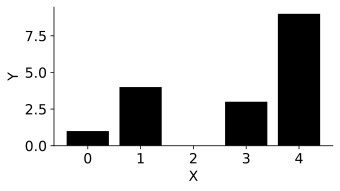

In [9]:
# Plot

#take the dimensions from the original figure
fig, ax = plt.subplots(figsize=(5,2.5))

# plotting the bars
ax.bar(X, Y, color='black')

# adding the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# display the figure
plt.show()

### Fig 3.5: Grouped bar plots

In [10]:
news_sources = np.array([[12, 17, 95, 35],
                         [90, 40, 50, 25]])
agegroups = ['Millenials', 'Boomers']

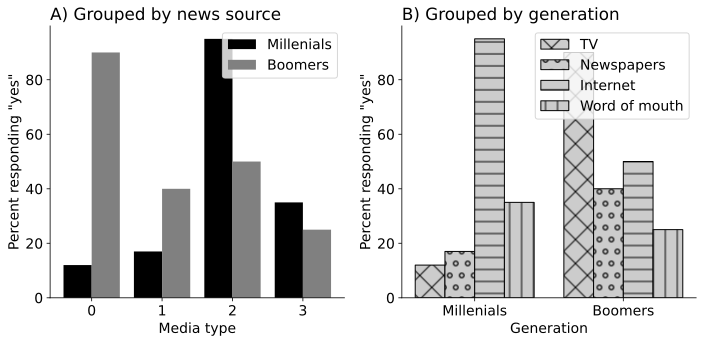

In [11]:
_, axs = plt.subplots(1,2, figsize=(10,5))

# plot the first bar chart
axs[0].bar(np.arange(4)-0.2, news_sources[0], width=0.4, color= 'black')
axs[0].bar(np.arange(4)+0.2, news_sources[1], width=0.4, color= 'gray')
axs[0].set(xlabel='Media type', ylabel='Percent responding "yes"', xticks=np.arange(4))
axs[0].legend(agegroups, loc='upper right')
axs[0].set_title(r'A) Grouped by news source')

# offset the second bar chart
offset = [-0.3, -0.1, 0.1, 0.3]
hatches = 'xo-|' # "hatch" is the fill pattern
for i in range(4):
    axs[1].bar(np.arange(2)+offset[i], news_sources[:,i], width=0.2, color=[0.8,0.8,0.8], hatch=hatches[i], edgecolor='k')

# make them colorful if you don't require grayscale
# for i in range(4):
#     axs[1].bar(np.arange(2)+offset[i], news_sources[:,i], width=0.2, hatch=hatches[i])

# plot the second bar chart
axs[1].set(xlabel='Generation', ylabel='Percent responding "yes"', xticks=np.arange(2))
axs[1].set_xticklabels(agegroups)
axs[1].legend(source_labels, loc='upper right')
axs[1].set_title(r'B) Grouped by generation')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.6: Bar charts and matrices

How a grouped bar chart is made from a matrix of numbers: in python `plt.bar()` groups bars by rows, such that columns within a row will have adjacent bars, while each row will be separated by a blank space on the x axis. thus, grouping bars the other way is done by transposing the data matrix to swap rows and columns.  (in R, you can create a new dataframe using the `mutate()` function.)

In [12]:
# data: observations (rows) and features (columns)
m = [[10,12,90,35],
     [85,15,50,10]]

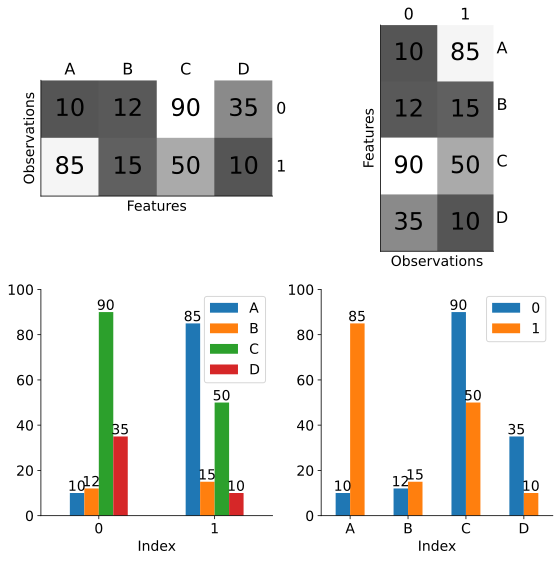

In [13]:
# Plot

# take the dimensions from the original figure
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

### Images

# show the data as an image
ax[0,0].imshow(m, cmap='gray', vmin=-30, vmax=90)

# add numerical labels
for i in range(len(m)):
    for j in range(len(m[0])):
        ax[0,0].text(j,i,m[i][j], fontsize=24, ha='center', va='center')
ax[0,0].set(xticks=[], yticks=[], xlabel='Features', ylabel='Observations')

# now the other orientation (features and observations swapped)

# show the data as an image
ax[0,1].imshow(np.array(m).T, cmap='gray', vmin=-30, vmax=90)

# add numerical labels
for i in range(len(m)):
    for j in range(len(m[0])):
        ax[0,1].text(i,j,m[i][j], fontsize=24, ha='center', va='center')
ax[0,1].set(xticks=[], yticks=[], xlabel='Observations', ylabel='Features')

# add text/ number indices to rows/columns in the images
for i,l in zip(range(4),'ABCD'):
  ax[0,0].text(i,-.6,l,ha='center',fontsize=16)
  ax[0,1].text(1.65,i,l,ha='center',fontsize=16)

for i in range(2):
  ax[0,0].text(3.65,i,str(i),va='center',ha='center',fontsize=16)
  ax[0,1].text(i,-.6,str(i),ha='center',fontsize=16)

### Bar plots

df = pd.DataFrame(m, columns=['A', 'B', 'C', 'D'])

# plot 1
h = df.plot(ax=ax[1,0], kind='bar', rot=0)
ax[1,0].set_ylim([0,100])

# add text labels
for p in h.patches:
    h.annotate(p.get_height(), [p.get_x()+0.06, p.get_height()+1], ha ='center', fontsize=14)

# set the x-axis labels
ax[1,0].set_xlabel('Index')

# plot 2
h = df.T.plot(ax=ax[1,1], kind='bar', rot=0)
ax[1,1].set_ylim([0,100])

# add text labels
for p in h.patches:
    h.annotate(p.get_height(), [p.get_x()+0.12, p.get_height()+1], ha ='center', fontsize=14)

# set the x-axis labels
ax[1,1].set_xlabel('Index')

# display the figure
plt.tight_layout()
plt.show()


Importantly, *the data are exactly the same*, but the interpretation of the results differs. And neither representation is correct or incorrect.

### Fig 3.8: Pie chart

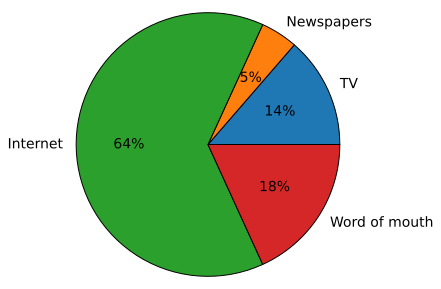

In [14]:
# data
most_news = [15,5,70,20]

# Plot (using dimensions from the original figure)
fig, ax = plt.subplots(figsize=(6.3,6.3))

# plotting the pie
ax.pie(most_news, labels=source_labels, autopct='%0.0f%%', radius=1.2, wedgeprops={'edgecolor':'k'})

# display the figure
plt.tight_layout()
plt.show()

### fig 3.9: Box plot

In [15]:
# random data with an outlier
data = np.random.randn(100)
data[data>2] = 1
data[data<-2] = -1
data[-1] = 3 # force one outlier

data

array([-8.89630473e-02,  2.50366081e-01, -3.76341947e-01,  8.52157221e-01,
        1.61051508e+00,  3.99129260e-01, -1.28083966e+00, -7.32257162e-01,
        1.50751463e+00, -1.22343199e+00, -1.13272059e-01, -2.21024421e-01,
       -1.61498646e-01,  4.03152504e-01, -6.14325729e-01,  1.42629057e+00,
       -4.91426847e-01, -5.23901348e-01, -1.05297119e-01,  6.29589714e-01,
       -6.81815698e-01, -2.33481609e-01, -1.87896355e-01, -8.57860787e-01,
        2.83817069e-01,  4.88106917e-01, -5.90054634e-01,  9.19303925e-01,
        8.02919843e-02, -1.14988781e-01,  3.16227562e-01, -7.40191584e-01,
        1.62052057e+00,  8.92790407e-01, -1.29485424e+00, -1.25516181e+00,
        1.86770881e-01,  1.00000000e+00,  1.75375033e+00, -6.35224954e-01,
       -8.19938876e-01,  8.77811526e-01, -1.13182317e-01, -6.44101585e-02,
        1.42209702e+00, -3.42431990e-01, -1.20949915e+00, -1.14724750e+00,
       -4.23841837e-01, -9.52551337e-01, -4.09586249e-01,  1.09912223e+00,
       -3.30351855e-01, -

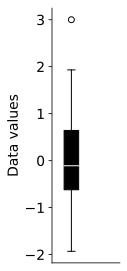

In [16]:
# plot

fig, ax = plt.subplots(figsize=(2,4))

h = plt.boxplot(data, patch_artist=True)
h['boxes'][0].set(color='k')
h['medians'][0].set(color='w')

plt.xlim([0.8, 1.5])
plt.xticks([])
plt.ylabel('Data values')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.10: Box plots for distribution characteristics

In [18]:
# data 
data = np.hstack((np.random.normal(loc=100, size=(200,1), scale=10),
                 np.random.normal(loc=100, size=(200,1), scale=2)))


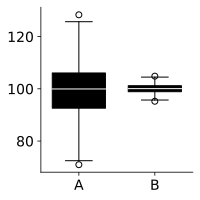

In [21]:
# boxplot
plt.figure(figsize=(3,3))
h = plt.boxplot(data, patch_artist=True, widths=0.7)
for (b,m) in zip(h['boxes'], h['medians']):
    b.set(color='k')
    m.set(color='w')

plt.xlim([0.5, 2.5])
plt.xticks(range(1,3), ['A', 'B'])
 
# display the figure
plt.tight_layout()
plt.show()

### Fig 3.11: Histogram

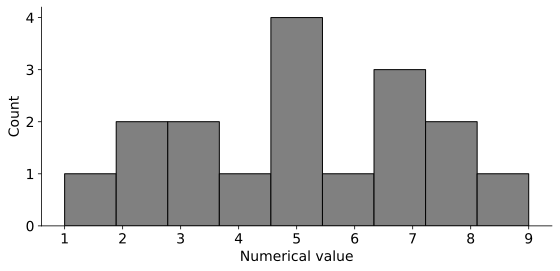

In [31]:
X = [1,2,2,3,3,4,5,5,5,5,6,7,7,7,8,8,9]

# histogram
plt.figure(figsize=(8,4))
plt.hist(X, bins=len(set(X)), color='gray', edgecolor='k')

# add the labels and ticks
plt.xticks(np.arange(np.min(X), np.max(X)+1))
plt.xlabel('Numerical value')
plt.ylabel('Count')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.12

### Fig 3.14: Histogram of mongoose lengths

### Fig 3.15: Histograms with different bins

### Fig 3.16: Distribution showing tails

### Fig 3.17: Histogram raw counts vs proportion

### Fig 3.19: The mongooses experiment

### Fig 3.21: Violin plot from histogram

### fig 3.22: Linear vs logarithmic plot

### Fig 3.24: Radial plots

### Fig 3.25: When not to use a radial plot